In [1]:
import pandas as pd
import seaborn as sns

для начала выгрузим данные и посмотрим на них

In [2]:
data = pd.read_csv('credit.csv', sep=';', encoding='cp1251')
data[:10]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0
5,6,F,NaN,MAR,SPC,NaN,10,1.1,NaN,SCH,СТАВРОПОЛЬСКИЙ КРАЙ,30000.0,0.0,0.0,0
6,7,M,34.0,MAR,SPC,"10317,00",6,1.5,NaN,SCH,ОБЛ НИЖЕГОРОДСКАЯ,28000.0,3.0,0.0,0
7,8,F,26.0,UNM,SPC,"47878,00",10,1.1,"0,512525",GRD,МОСКОВСКАЯ ОБЛ,60000.0,3.0,0.0,0
8,9,M,23.0,UNM,SPC,"37577,16",12,1.6,NaN,SCH,ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА,50000.0,3.0,0.0,0
9,10,F,32.0,UNM,SPC,"26268,00",10,1.1,"0,465026",GRD,КРАЙ СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0


In [3]:
data.dtypes

client_id                 int64
gender                   object
age                     float64
marital_status           object
job_position             object
credit_sum               object
credit_month              int64
tariff_id               float64
score_shk                object
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

оценим сколько nan в выборке

In [4]:
data.isna().sum()

client_id                  0
gender                     0
age                        3
marital_status             3
job_position               0
credit_sum                 2
credit_month               0
tariff_id                  0
score_shk                  7
education                  5
living_region            192
monthly_income             5
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

я не могу применять в выборке те данные в которых есть nan в следующих полях: 'age', 'marital_status', 'credit_sum', 'monthly_income', 'credit_count', 'overdue_credit_count'; регион проживания по моему мнению не сильно важен

In [5]:
data = data.dropna(subset=['age', 'marital_status', 'credit_sum', 'monthly_income', 'credit_count', 'overdue_credit_count'])
data.isna().sum()

client_id                 0
gender                    0
age                       0
marital_status            0
job_position              0
credit_sum                0
credit_month              0
tariff_id                 0
score_shk                 2
education                 2
living_region           174
monthly_income            0
credit_count              0
overdue_credit_count      0
open_account_flg          0
dtype: int64

изучим статистики по нашему датасету

In [6]:
data.describe()

,client_id,age,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,161509.000000,161509.000000,161509.000000,161509.000000,161509.000000,161509.000000,161509.000000,161509.000000
mean,85365.785777,37.041069,10.990595,1.320702,40417.042660,2.107319,0.046066,0.164740
std,49276.577135,10.399466,3.542540,0.235621,25324.839551,1.777140,0.211539,0.370947
min,7.000000,18.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.000000,29.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,0.000000
50%,85371.000000,35.000000,10.000000,1.320000,35000.000000,2.000000,0.000000,0.000000
75%,128056.000000,43.000000,12.000000,1.600000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


In [7]:
data[['open_account_flg']].value_counts()

open_account_flg
0                   134902
1                    26607
dtype: int64

In [8]:
data[['overdue_credit_count']].value_counts()

overdue_credit_count
0.0                     154129
1.0                       7325
2.0                         50
3.0                          5
dtype: int64

In [9]:
data[['credit_count']].value_counts()

credit_count
1.0             45277
2.0             36995
0.0             25805
3.0             23918
4.0             14113
5.0              7542
6.0              3915
7.0              1962
8.0              1007
9.0               476
10.0              220
11.0              129
12.0               74
13.0               33
14.0               15
15.0               13
17.0                5
16.0                4
19.0                3
18.0                2
21.0                1
dtype: int64

In [10]:
data[['credit_month']].value_counts()

credit_month
10              91012
12              42512
6                9680
24               5834
18               2756
14               2501
4                1292
3                1158
8                 943
13                798
9                 595
36                480
11                461
16                364
5                 349
7                 338
15                218
20                101
17                 34
19                 16
22                 11
30                 11
23                 11
26                  8
28                  8
21                  6
25                  4
32                  4
27                  2
29                  1
31                  1
dtype: int64

выявим визуально зависимости по некоторым полям

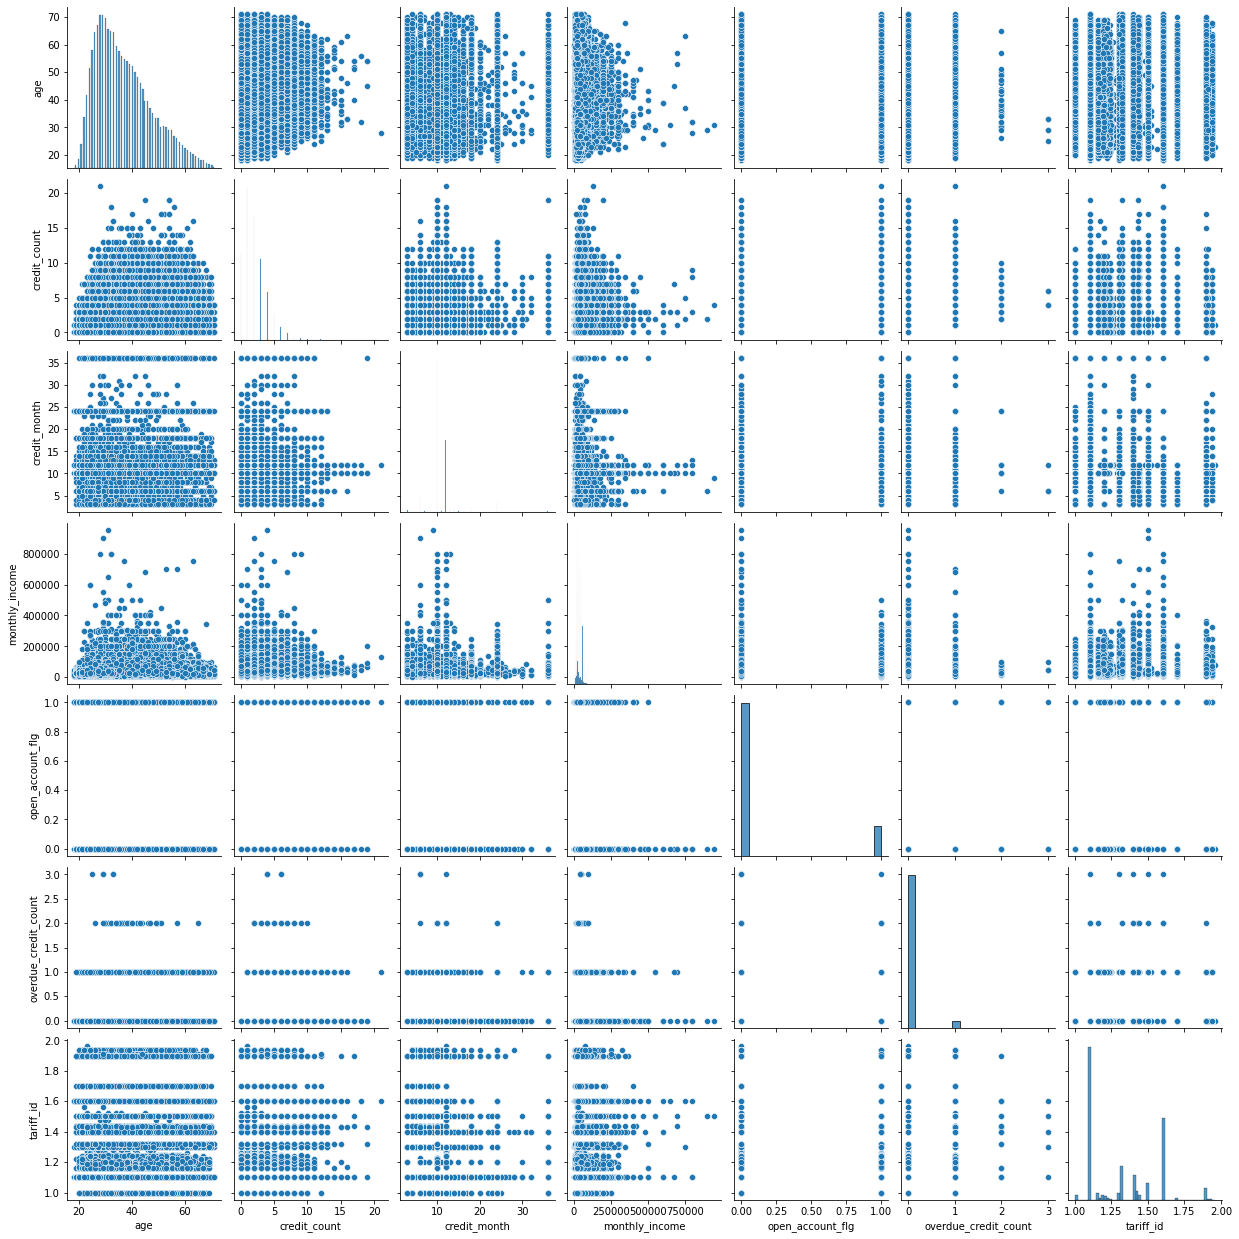

In [11]:
sns.pairplot(data[data.columns.difference(['client_id'])])

мне кажется, что для классификации почти все поля важны, выделил наиболее значимые:
1. Возраст
1. Семейный статус
1. Сфера занятости
1. Сумма кредита
1. Срок кредитования
1. Месячный заработок
1. Количество кредитов у клиента
1. Количество просроченных кредитов у клиента

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

проведем классификацию того откроет ли кредитный счет клиент или нет по некоторым признакам с помощью алгоритма Random Forest

для начала разделим данные на обучающую выборку и тестовую

In [13]:
x = data[['age', 'monthly_income', 'credit_count', 'overdue_credit_count']]

In [14]:
y = data['open_account_flg']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

обучаем классификатор на основе случайного леса, пройдясь по сетке гиперпараметров, найдя наилучшие

In [16]:
grid_params = {'bootstrap': [True, False] + [None],
 'n_estimators': [i for i in range(10, 100, 10)] + [None]}

In [17]:
model1 = GridSearchCV(RandomForestClassifier(), grid_params, cv=5, n_jobs=-1)

In [18]:
model1.fit(x_train, y_train)

c:\users\jarvis\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.81100518 0.81236735 0.81291574 0.81259732 0.81297766 0.81284497
 0.81303074 0.81319878 0.81349068        nan 0.81374718 0.8137118
 0.81356144 0.81329608 0.81339338 0.81339338 0.8134376  0.81333146
 0.81337568        nan 0.81367642 0.81363219 0.81369411 0.81341106
 0.8135349  0.81352605 0.81351721 0.81351721 0.81337568        nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False, None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          None]})

In [19]:
model1.best_params_

{'bootstrap': False, 'n_estimators': 10}

In [20]:
predictions1 = model1.best_estimator_.predict(x_test)

обучаем классификатор на основе логистической регрессии, пройдясь по сетке гиперпараметров, найдя наилучшие

In [21]:
grid_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] + [None],
'penalty': ['l1', 'l2', 'elasticnet'] + [None],
'C': [100, 10, 1.0, 0.1, 0.01] + [None]}

In [22]:
model2 = GridSearchCV(LogisticRegression(), grid_params, cv=5, n_jobs=-1)

In [23]:
model2.fit(x_train, y_train)

c:\users\jarvis\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83579819        nan 0.83579819        nan
 0.83579819 0.83579819 0.83579819 0.83579819 0.83579819        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.83579819        nan 0.83579819        nan
 0.83579819 0.83579819 0.83579819 0.83579819 0.83579819        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.83579819        nan 0.83579819        nan
 0.83579819 0.83579819 0.83579819 0.83579819 0.83579819        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, None],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', None]})

In [24]:
model2.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [25]:
predictions2 = model2.best_estimator_.predict(x_test)

используем различные метрики для оценки качества обучения классификаторов

In [26]:
accuracy_score(y_test, predictions1)

0.8154913008482447

In [27]:
grid_params = {'bootstrap': [True, False] + [None],
 'n_estimators': [i for i in range(10, 100, 10)] + [None]}

In [28]:
accuracy_score(y_test, predictions2)

0.8340040864342765

In [29]:
precision_score(y_test, predictions1, pos_label=1, zero_division=0)

0.22021210230817218

In [30]:
precision_score(y_test, predictions2, pos_label=1, zero_division=0)

0.0

In [31]:
recall_score(y_test, predictions1, pos_label=1, zero_division=0)

0.04388909610841726

In [32]:
recall_score(y_test, predictions2, pos_label=1, zero_division=0)

0.0

In [33]:
model2.fit(x_train, y_train)

c:\users\jarvis\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83579819        nan 0.83579819        nan
 0.83579819 0.83579819 0.83579819 0.83579819 0.83579819        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.83579819        nan 0.83579819        nan
 0.83579819 0.83579819 0.83579819 0.83579819 0.83579819        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.83579819        nan 0.83579819        nan
 0.83579819 0.83579819 0.83579819 0.83579819 0.83579819        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, None],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga', None]})

In [34]:
roc_auc_score(y_test, predictions1)

0.5064780793583413

In [35]:
roc_auc_score(y_test, predictions2)

0.5

`accuracy` в обоих моделях получился довольно неплохой и может показаться что модели хороши описывают данные, но следующие метрики показывают нам что не все так хорошо. `precision` у обоих моделей низкий, т.е. модели определили малую долю объектов положительными и при этом действительно являющихся положительными. `recall` низкий т.е. модели определили мало объектов положительного класса из всех объектов положительного класса. `roc auc` на уровне 0.5 в обоих моделях, что говорит нам о том, что наши модели непригодны и соответствуют случайному гаданию. 

Такие низкие показатели обусловлены несбалансированностью классифицируемых классов и плохому выбору и настройке моделей.